In [17]:
""" Sonorizing a simple hidden Markov model.

    Just a fun experiment: build a sequence of observations based on the HMM
    principles, then sonorize using equal duration notes and mapping the input
    to the twelve chromatic pitches.

"""

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Audio

def make_observation(s, states):
    #   Generate random integer from uniform range define in 'states'.
    return np.random.choice(states[s])

def pick_next_state(current_state, transition_matrix):
    #   Pick next state given current state and transition probabilities.
    N = transition_matrix.shape[0]
    return np.random.choice(N, p=transition_matrix[current_state, :])

def make_output_sequence(sequence_length, transition_matrix, states, init_probs):
    sequence = []

    N = transition_matrix.shape[0]
    s = np.random.choice(N, p=init_probs)

    for _ in range(sequence_length):
        sequence.append(make_observation(s, states))
        s = pick_next_state(s, transition_matrix)

    return np.array(sequence)

In [12]:
def sonorize_HMM(sequence, note_dur=0.25, fs=44100, f0=220):
    length_in_samps = int(len(sequence) * note_dur * fs)
    x = np.zeros(length_in_samps)

    note_length_samps = int(note_dur * fs)

    wav_in = 0
    wav_out = wav_in + note_length_samps

    for i in range(len(sequence)):
        if sequence[i] != sequence[i -1]:
            x[wav_in:wav_out] += generate_note(sequence[i],
                                            note_dur,
                                            fs,
                                            f0)

        wav_in += note_length_samps
        wav_out += note_length_samps

    return x

def generate_note(pitch_value=0, note_dur=0.5, fs=44100, f0=440, 
                  note_end_thresh=0.01, noise=False):
    note_length_samps = int(note_dur * fs)
    t = np.linspace(0, note_dur, note_length_samps, endpoint=False) # shouldn't have to be recalculated

    alpha = -note_dur/np.log(note_end_thresh)
    amp_envelope = np.exp(-t/alpha)
    if not noise:
        f = 2**(pitch_value/12) * f0
        x = np.sin(2 * np.pi * f * t)
    else:
        x = np.random.rand(note_length_samps)
    return amp_envelope * x


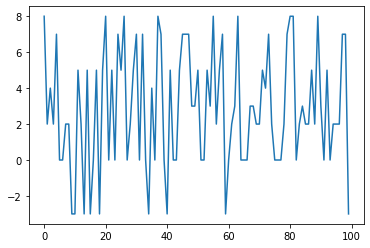

In [16]:
sequence_length_test = 100

#   Define boundaries for uniform integer distributions.
states_test = [[-3, 0, 2, 4], [0, 2, 3, 5, 7, 8], [0, 2, 5, 7]]

#   Transition probabilities between states.
transition_matrix_test = np.array([[0.5 , 0.1, 0.4 ],
                                   [0.05, 0.5, 0.45],
                                   [0.3 , 0.2, 0.5 ]])

init_probs_test = np.array([0.33, 0.33, 0.34])

pitches = make_output_sequence(sequence_length_test,
                               transition_matrix_test,
                               states_test,
                               init_probs_test
                               )

plt.plot(pitches)
plt.show()

x = sonorize_HMM(pitches, f0=440)

Audio(x, rate=44100)